## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [ ]:
!pip install mysql-connector-python
import pandas as pd
import numpy as np
import mysql.connector

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/DataScience/ratings.csv',sep='\t')
movies = pd.read_csv('/content/drive/MyDrive/DataScience/movies.csv',sep='\t')

,Unnamed: 0,movieID,title,genre
977,977,989,Schlafes Bruder (Brother of Sleep) (1995),Drama


In [ ]:
meanRating = ratings.groupby('movieID')[['rating']].mean()

las_mejores_50 = meanRating.sort_values('rating',ascending=False).head(50)
las_mejores_50 = las_mejores_50.reset_index(level='movieID')


In [ ]:
las_mejores_50.merge(movies[['movieID','title']],how='inner')

,movieID,rating,title
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995)
1,3881,5.000000,Bittersweet Motel (2000)
2,1830,5.000000,Follow the Bitch (1998)
3,3382,5.000000,Song of Freedom (1936)
4,787,5.000000,"Gate of Heavenly Peace, The (1995)"
5,3280,5.000000,"Baby, The (1973)"
6,3607,5.000000,One Little Indian (1973)
7,3233,5.000000,Smashing Time (1967)
8,3172,5.000000,Ulysses (Ulisse) (1954)
9,3656,5.000000,Lured (1947)


Pídele a tu experta la función de verificación `plotting_best_50` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

KeyError: ignored

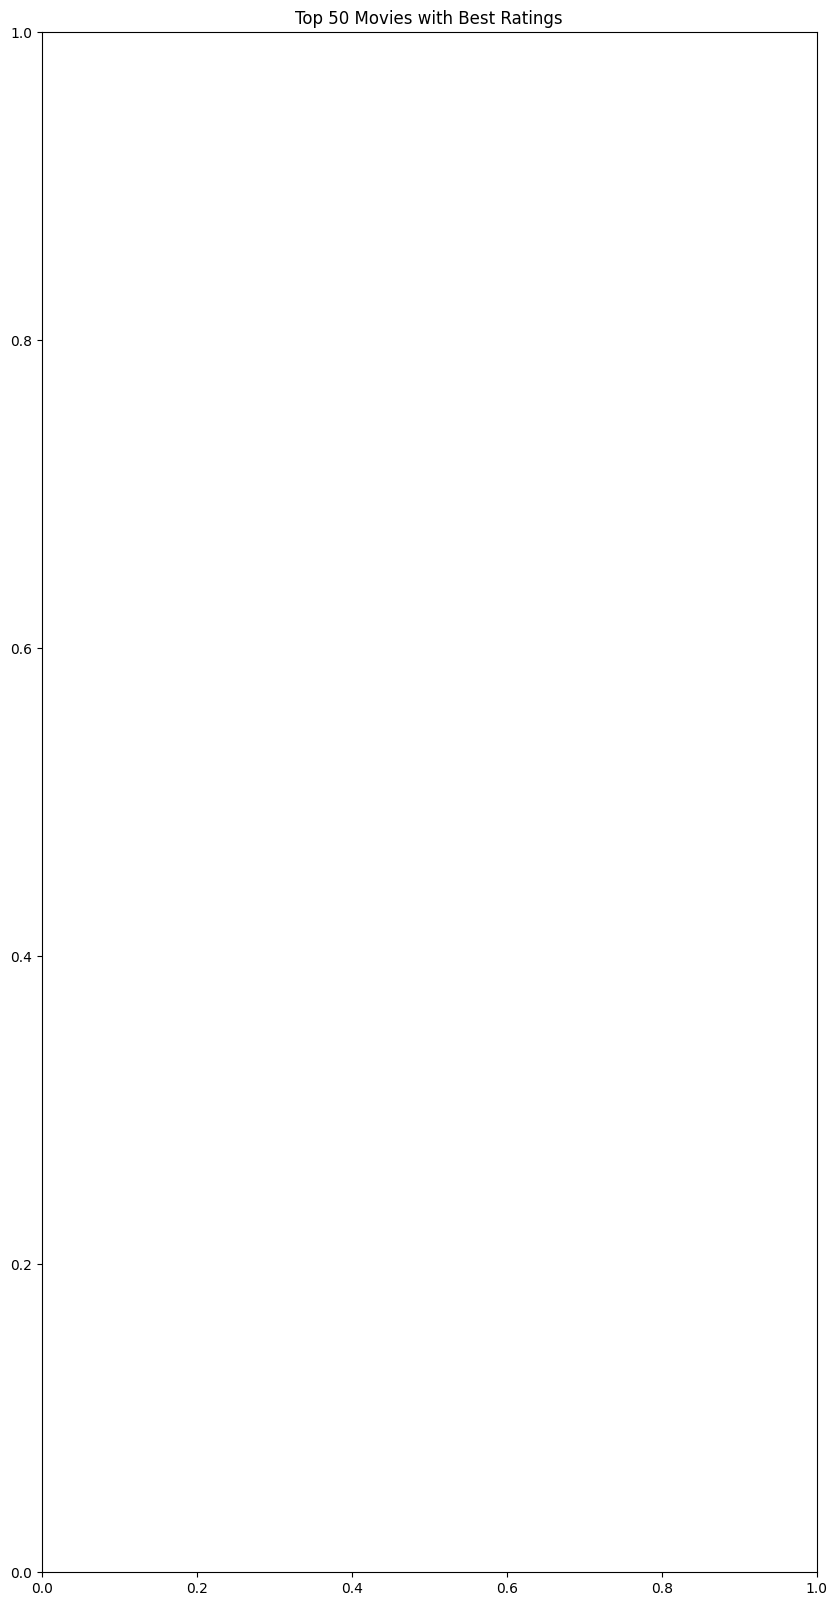

In [ ]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')

plotting_best_50(las_mejores_50)